In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("benchmark_dream.txt")


def visualize_numerical(test_name, title):
    # Provided data
    data = df[df["Test_Name"] == test_name]
    data = data.drop("Test_Name", axis=1)

    # Plotting
    fig, axs = plt.subplots(3, 2, figsize=(12, 10))  # Adjusted size for clarity
    fig.suptitle(title)

    # Subplot for RMSE Mean
    axs[0, 0].plot(data["Test_Case"], data["RMSE_Mean"], marker="o")
    axs[0, 0].set_title("RMSE Mean")
    axs[0, 0].set_xlabel("Test Case")
    axs[0, 0].set_ylabel("RMSE Mean")

    # Subplot for RMSE Max
    axs[0, 1].plot(data["Test_Case"], data["RMSE_Max"], marker="o", color="red")
    axs[0, 1].set_title("RMSE Max")
    axs[0, 1].set_xlabel("Test Case")
    axs[0, 1].set_ylabel("RMSE Max")

    # Subplot for MAE Mean
    axs[1, 0].plot(data["Test_Case"], data["MAE_Mean"], marker="o", color="green")
    axs[1, 0].set_title("MAE Mean")
    axs[1, 0].set_xlabel("Test Case")
    axs[1, 0].set_ylabel("MAE Mean")

    # Subplot for MAE Max
    axs[1, 1].plot(data["Test_Case"], data["MAE_Max"], marker="o", color="purple")
    axs[1, 1].set_title("MAE Max")
    axs[1, 1].set_xlabel("Test Case")
    axs[1, 1].set_ylabel("MAE Max")

    # Subplot for Computation Time
    axs[2, 0].plot(data["Test_Case"], data["Time"], marker="o", color="orange")
    axs[2, 0].set_title("Computation Time")
    axs[2, 0].set_xlabel("Test Case")
    axs[2, 0].set_ylabel("Time (Seconds)")

    # Adjust layout to prevent overlap of subplots
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the plot
    plt.show()
    plt.savefig(f"mh_benchmark_{test_name}", dpi=fig.dpi)


def visualize_categorical(test_name, title):
    # Data preparation
    data = df[df["Test_Name"] == test_name]
    data = data.drop("Test_Name", axis=1)

    data_T = {
        "Configuration": data["Test_Case"].tolist(),
        "RMSE_Mean": data["RMSE_Mean"].astype(float).tolist(),
        "RMSE_Max": data["RMSE_Max"].astype(float).tolist(),
        "MAE_Mean": data["MAE_Mean"].astype(float).tolist(),
        "MAE_Max": data["MAE_Max"].astype(float).tolist(),
        "Time": data["Time"].astype(float).tolist(),
    }

    data = pd.DataFrame(data_T)

    # Set up the matplotlib figure
    fig, axs = plt.subplots(
        nrows=3, ncols=2, figsize=(12, 18)
    )  # Adjust the size as needed
    axs = axs.flatten()  # Flatten the array of axes for easier iteration
    fig.suptitle(title)

    # Plot each metric
    metrics = ["RMSE_Mean", "RMSE_Max", "MAE_Mean", "MAE_Max", "Time"]
    colors = [
        "skyblue",
        "orange",
        "lightgreen",
        "red",
        "purple",
    ]  # Different color for each plot

    for ax, metric, color in zip(axs, metrics, colors):
        data.plot(
            kind="bar", x="Configuration", y=metric, ax=ax, color=color, legend=False
        )
        ax.set_title(metric)
        ax.set_xlabel("Configuration")
        ax.set_ylabel(metric)

    # Remove empty subplots if there are any
    for i in range(len(metrics), len(axs)):
        fig.delaxes(axs[i])

    fig.tight_layout(pad=3.0)  # Adjust spacing between plots
    plt.show()
    # plt.savefig(f'mh_benchmark_{test_name}', dpi=fig.dpi)

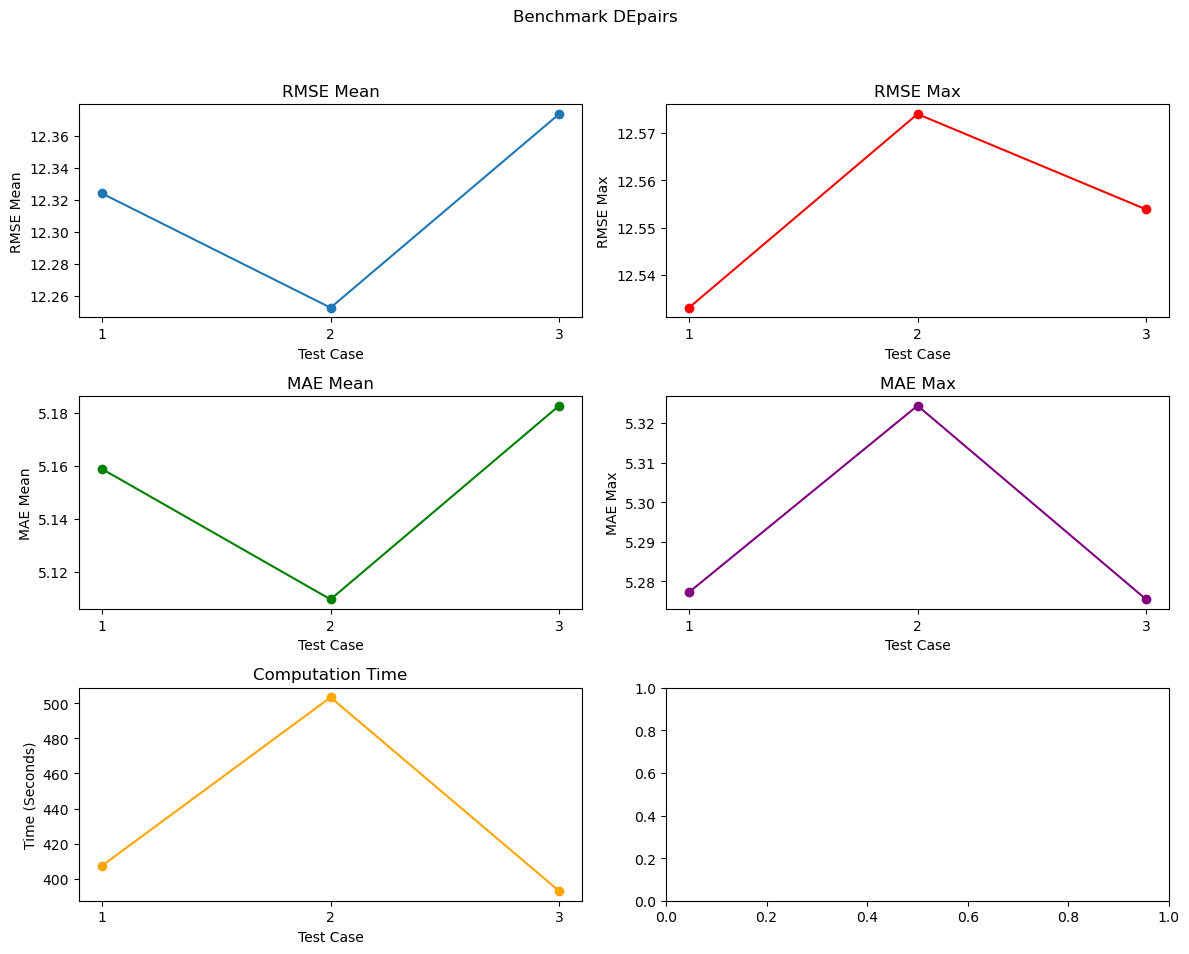

<Figure size 640x480 with 0 Axes>

In [3]:
visualize_numerical("DEpairs", "Benchmark DEpairs")

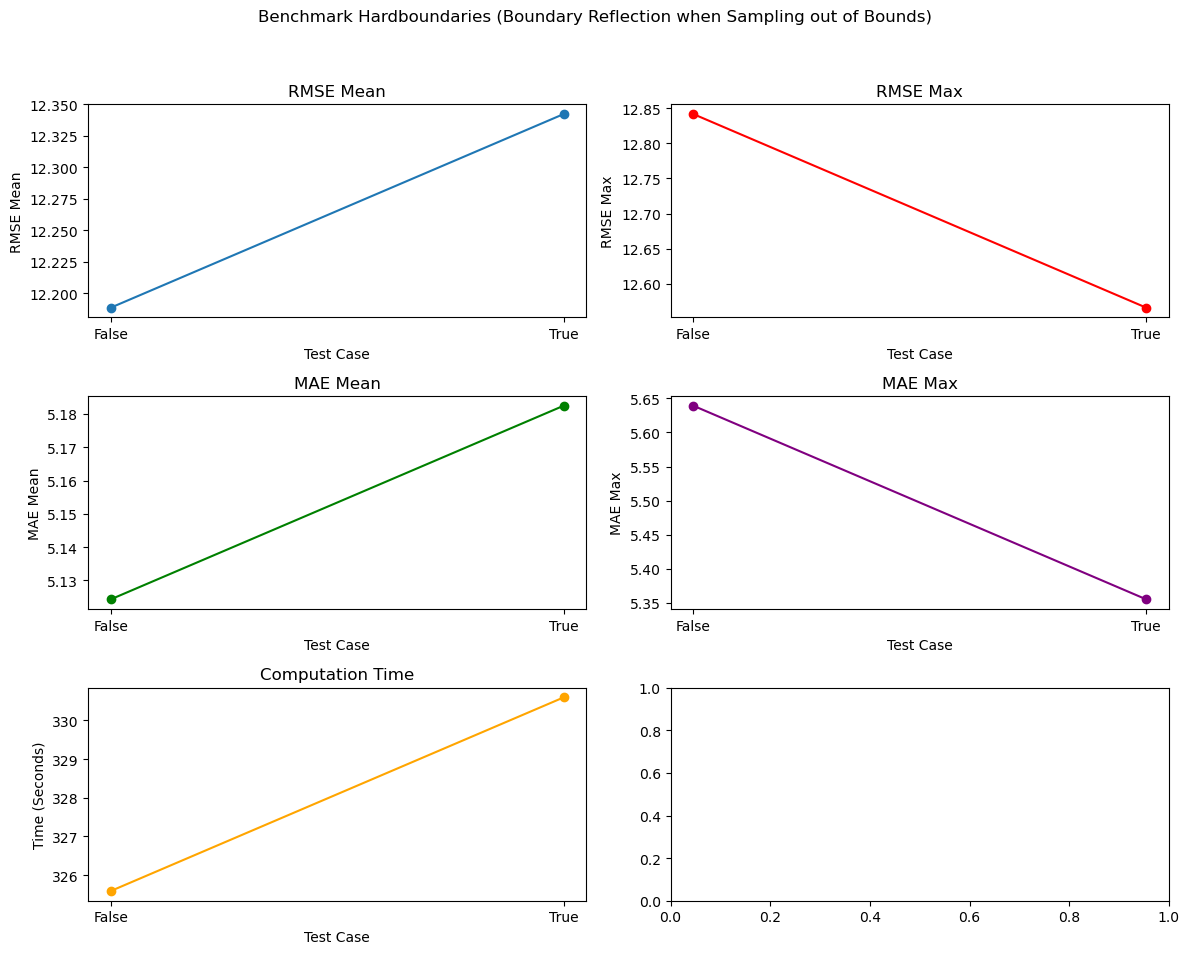

<Figure size 640x480 with 0 Axes>

In [4]:
visualize_numerical(
    "hardboundaries",
    "Benchmark Hardboundaries (Boundary Reflection when Sampling out of Bounds)",
)

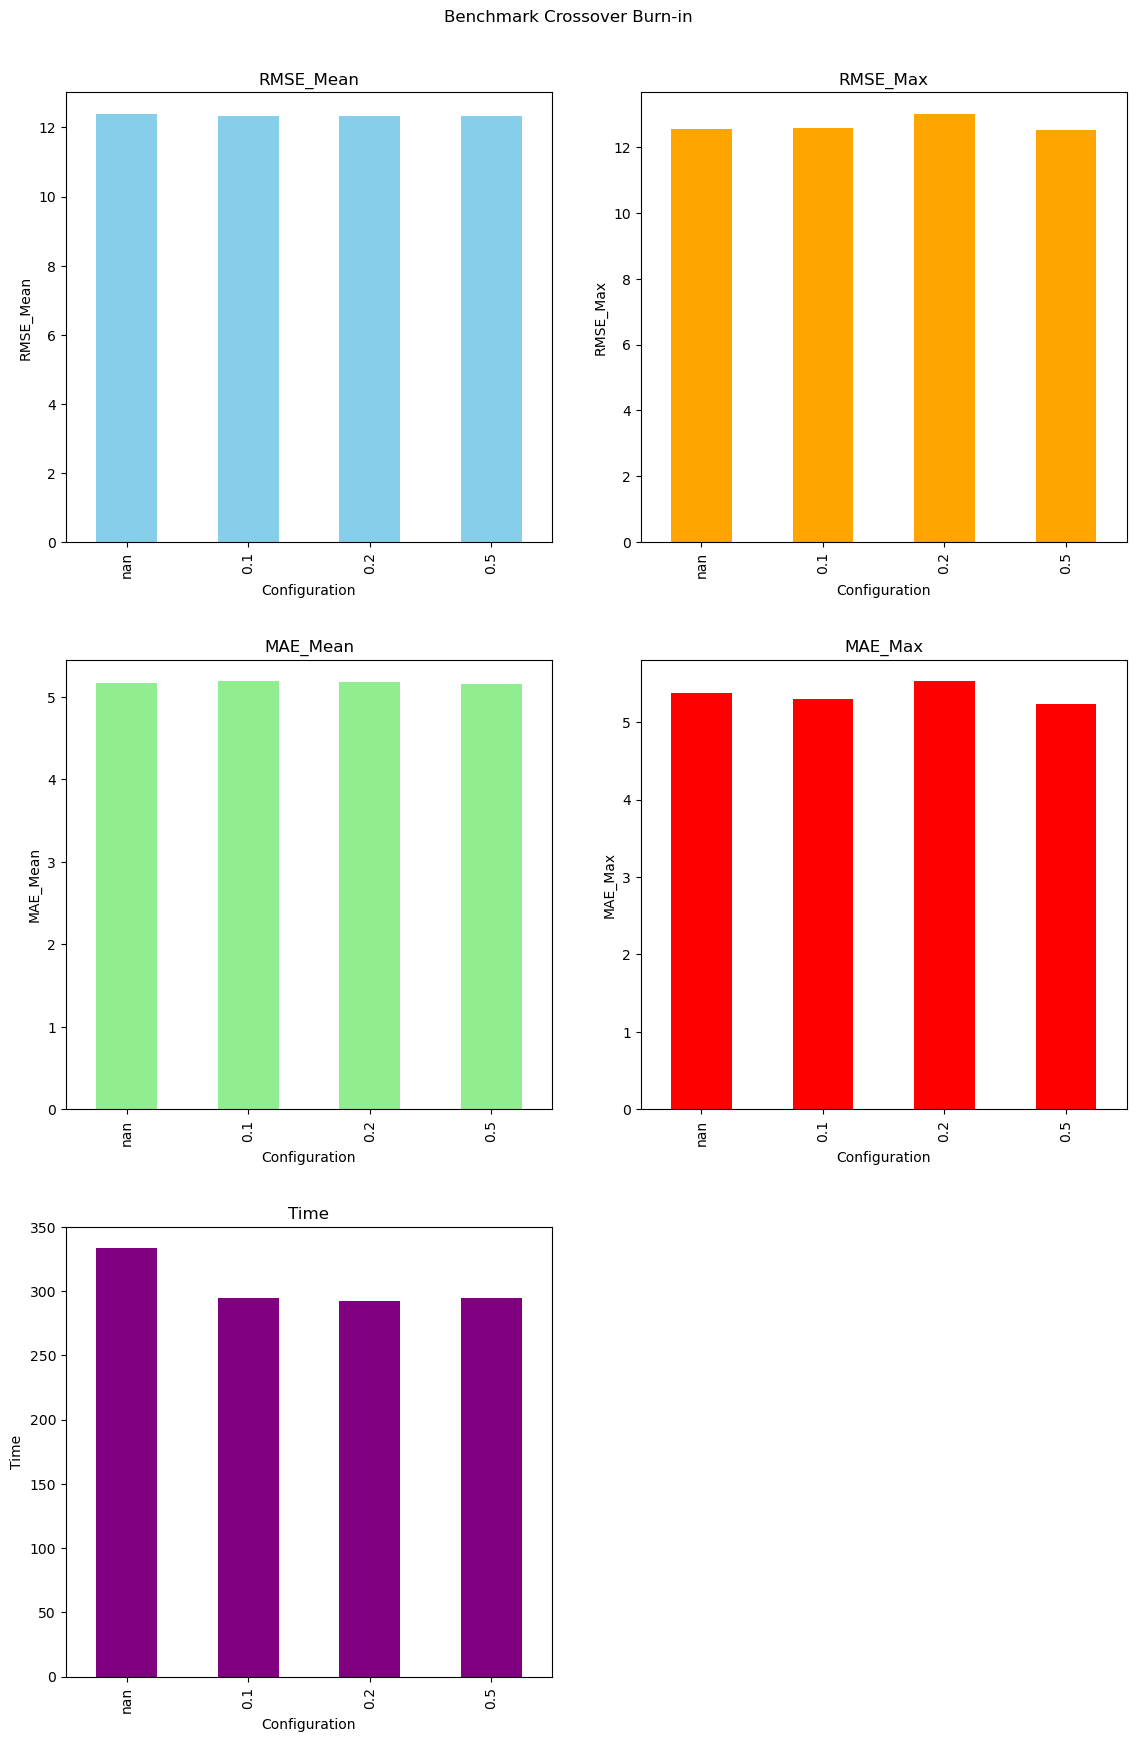

In [5]:
visualize_categorical("crossover_burnin", "Benchmark Crossover Burn-in")

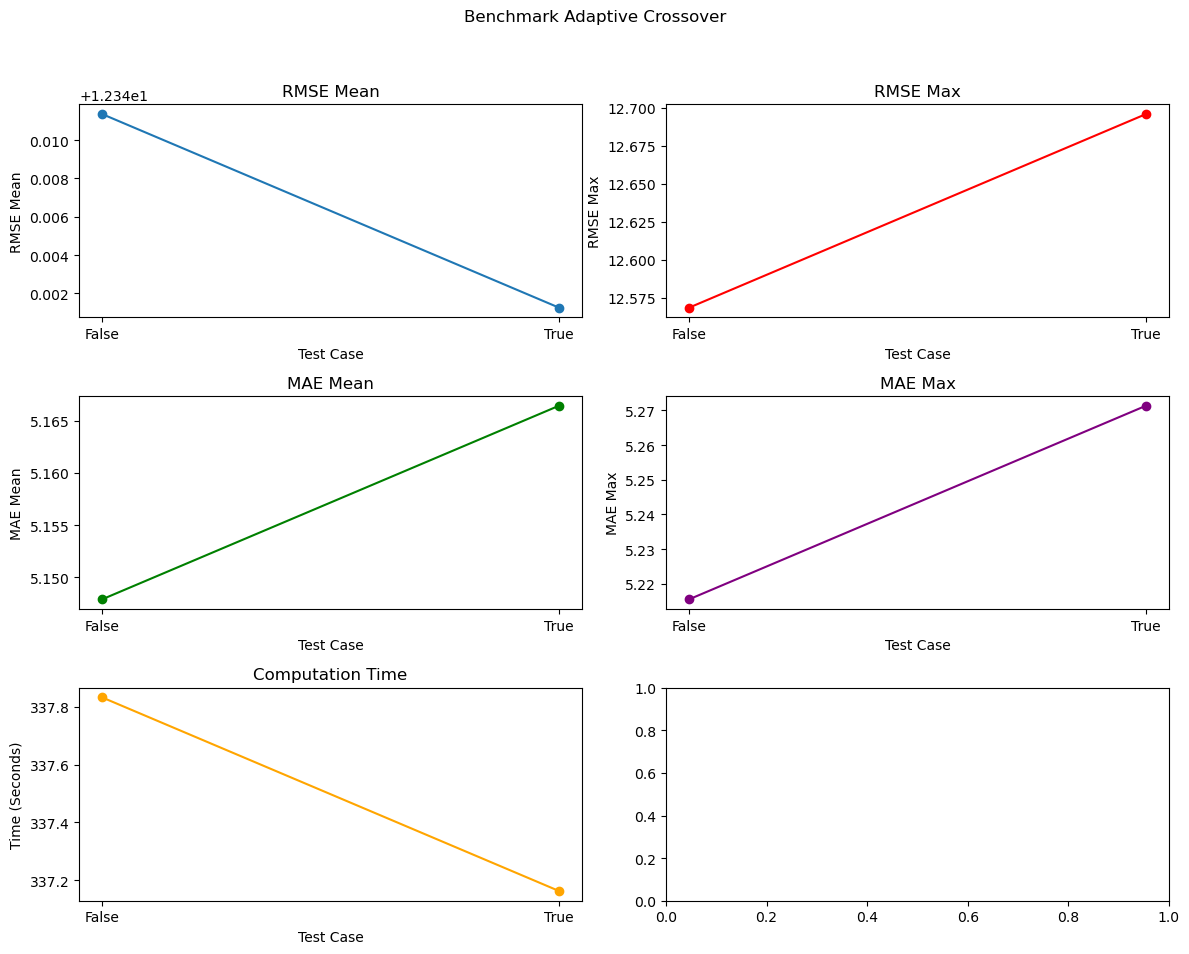

<Figure size 640x480 with 0 Axes>

In [6]:
visualize_numerical("adapt_crossover", "Benchmark Adaptive Crossover")

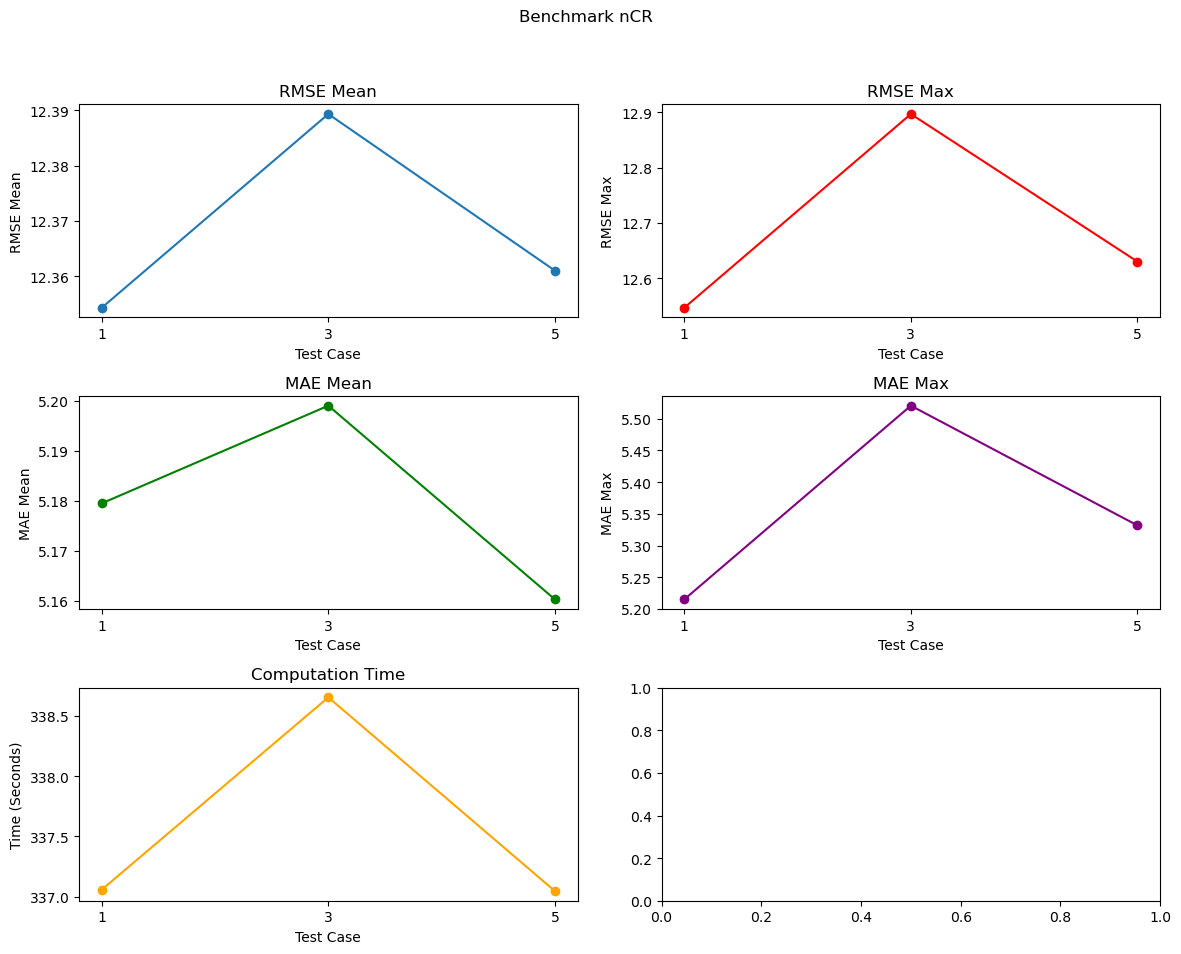

<Figure size 640x480 with 0 Axes>

In [7]:
visualize_numerical("nCR", "Benchmark nCR")

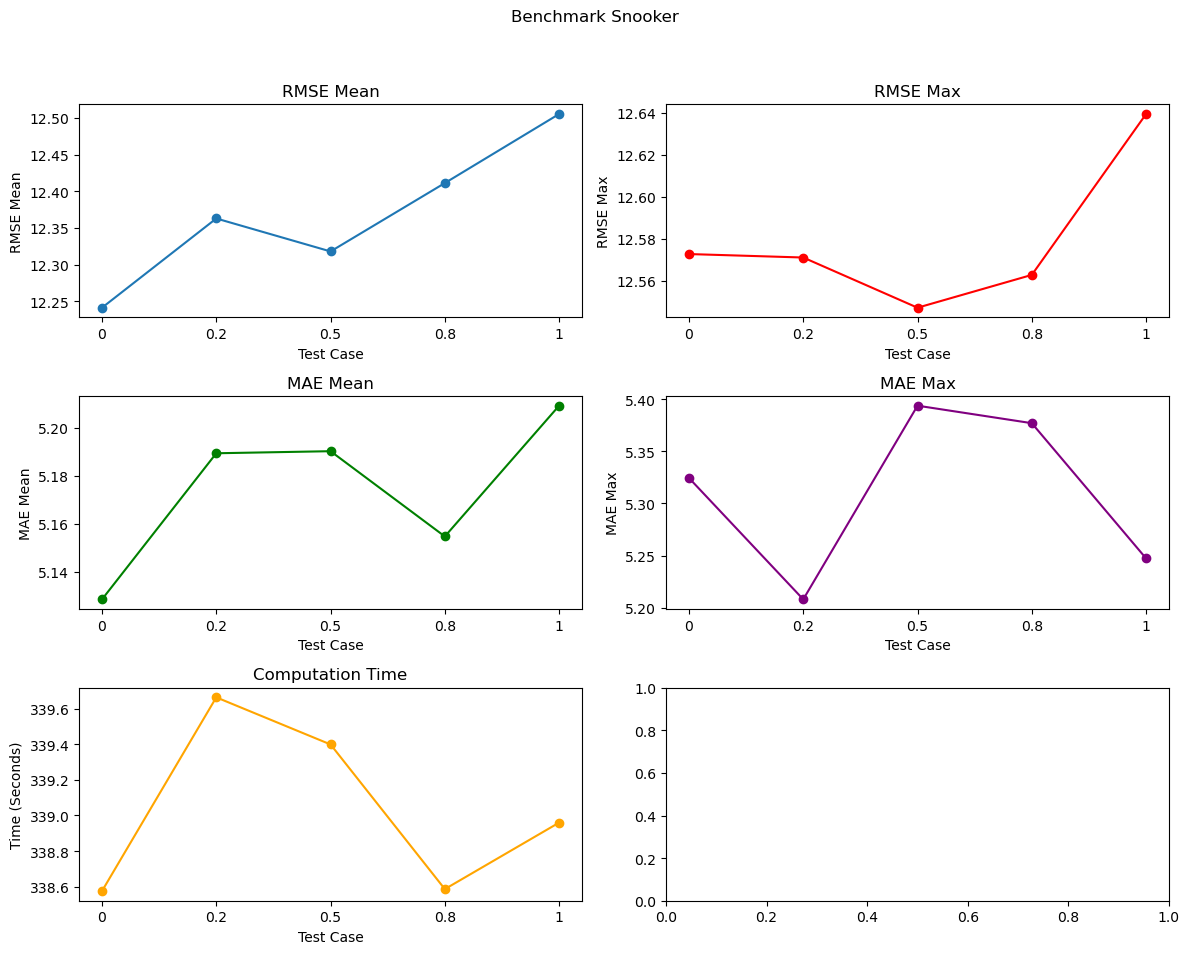

<Figure size 640x480 with 0 Axes>

In [8]:
visualize_numerical("snooker", "Benchmark Snooker")

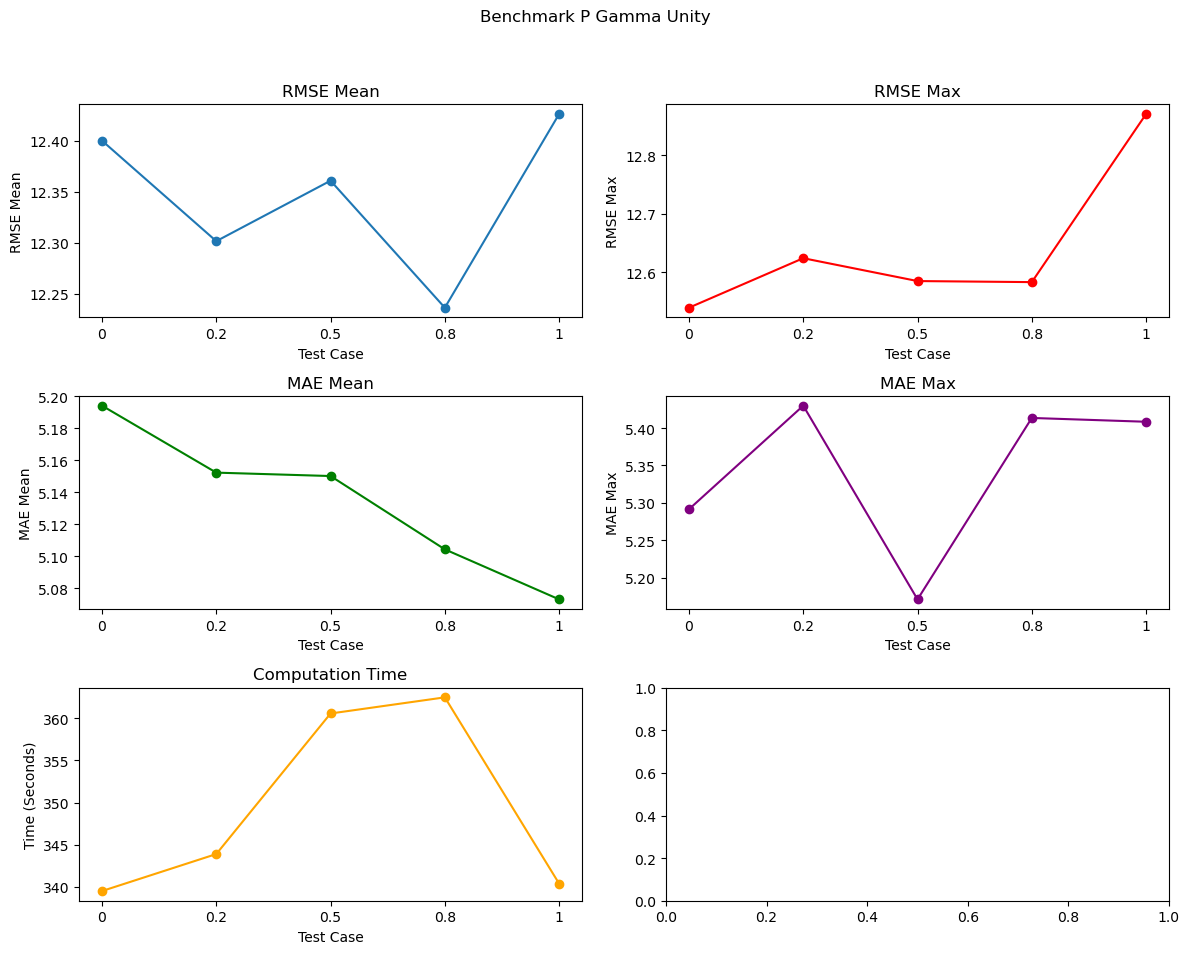

<Figure size 640x480 with 0 Axes>

In [9]:
visualize_numerical("p_gamma_unity", "Benchmark P Gamma Unity")

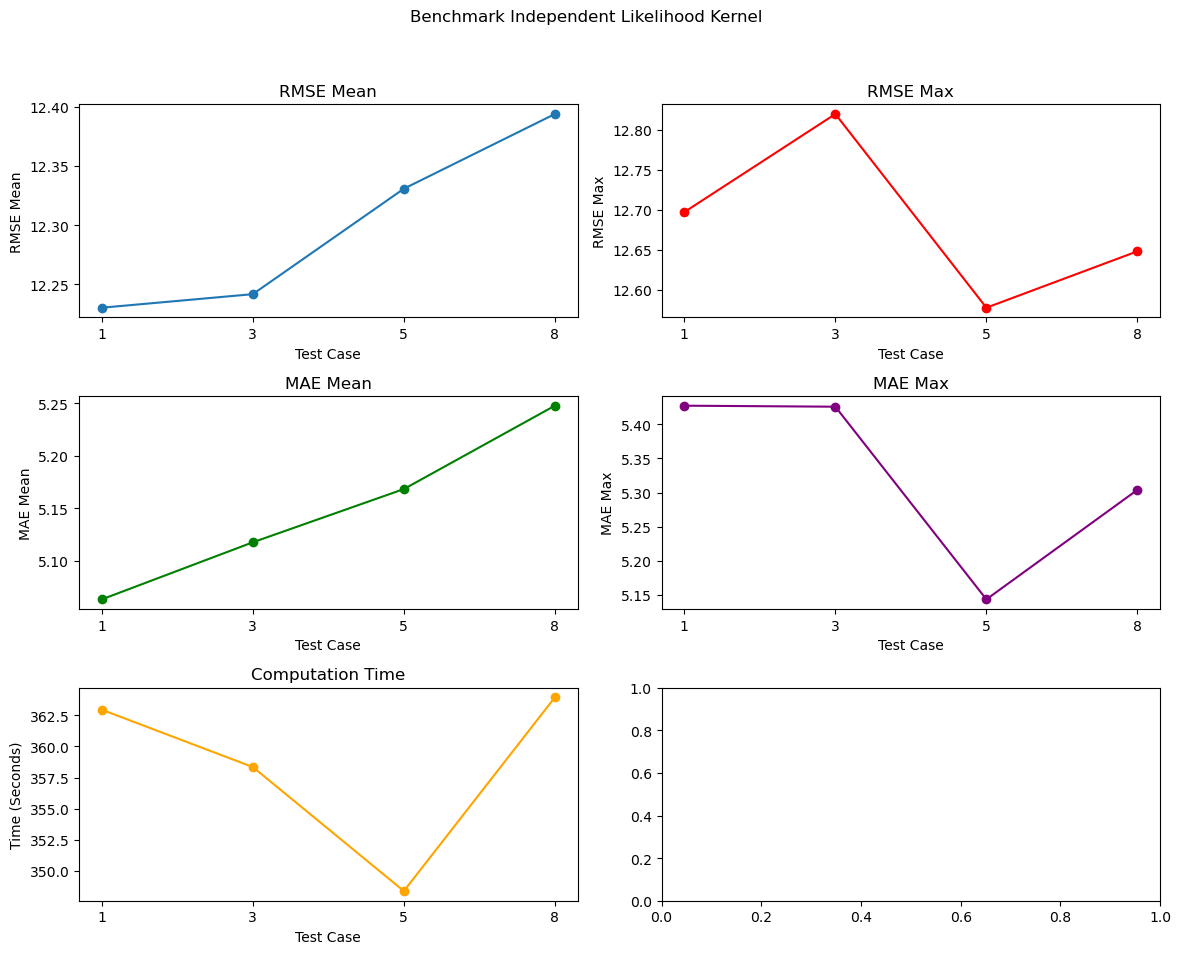

<Figure size 640x480 with 0 Axes>

In [10]:
visualize_numerical(
    "sensitivity_likelihood_independent", "Benchmark Independent Likelihood Kernel"
)

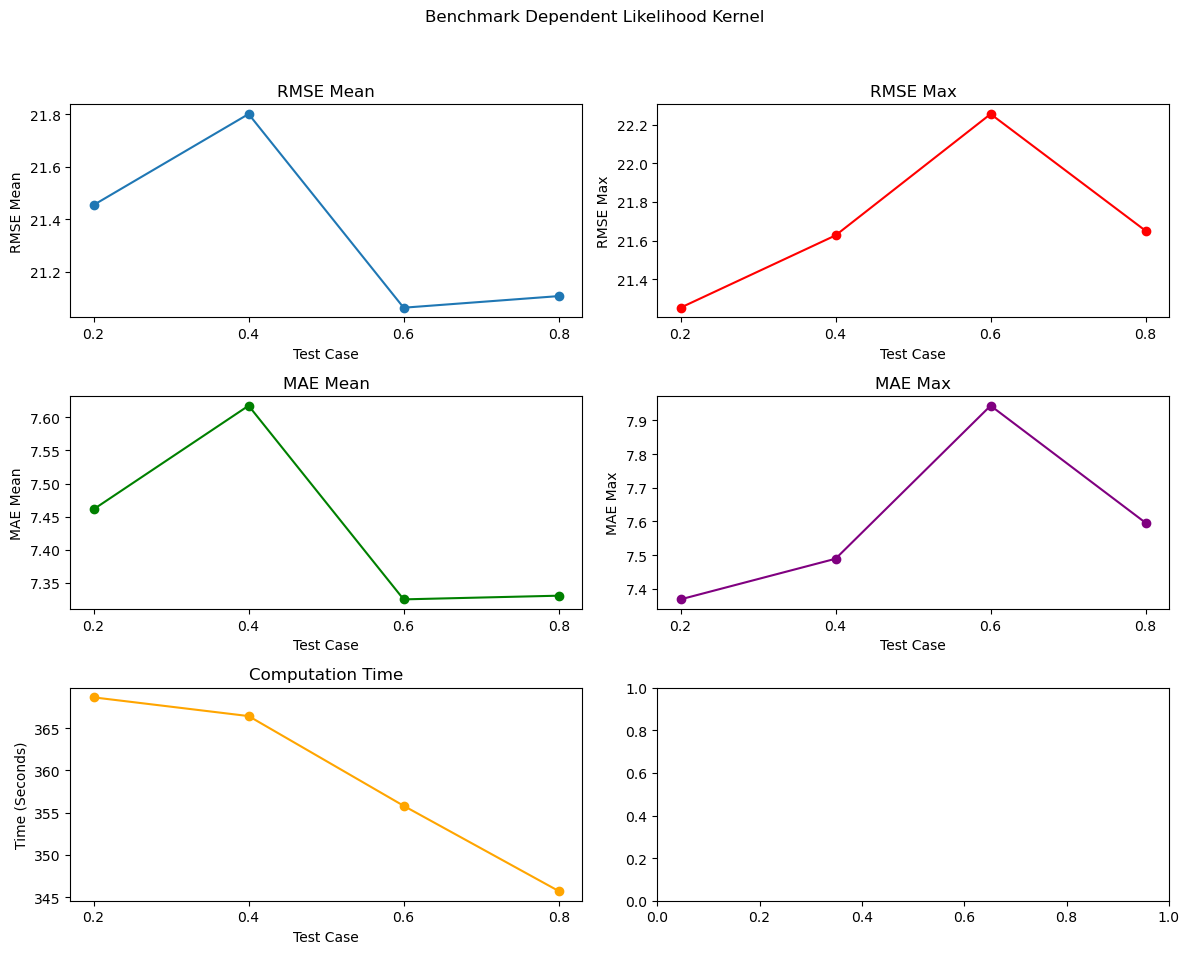

<Figure size 640x480 with 0 Axes>

In [11]:
visualize_numerical(
    "sensitivity_likelihood_dependent", "Benchmark Dependent Likelihood Kernel"
)

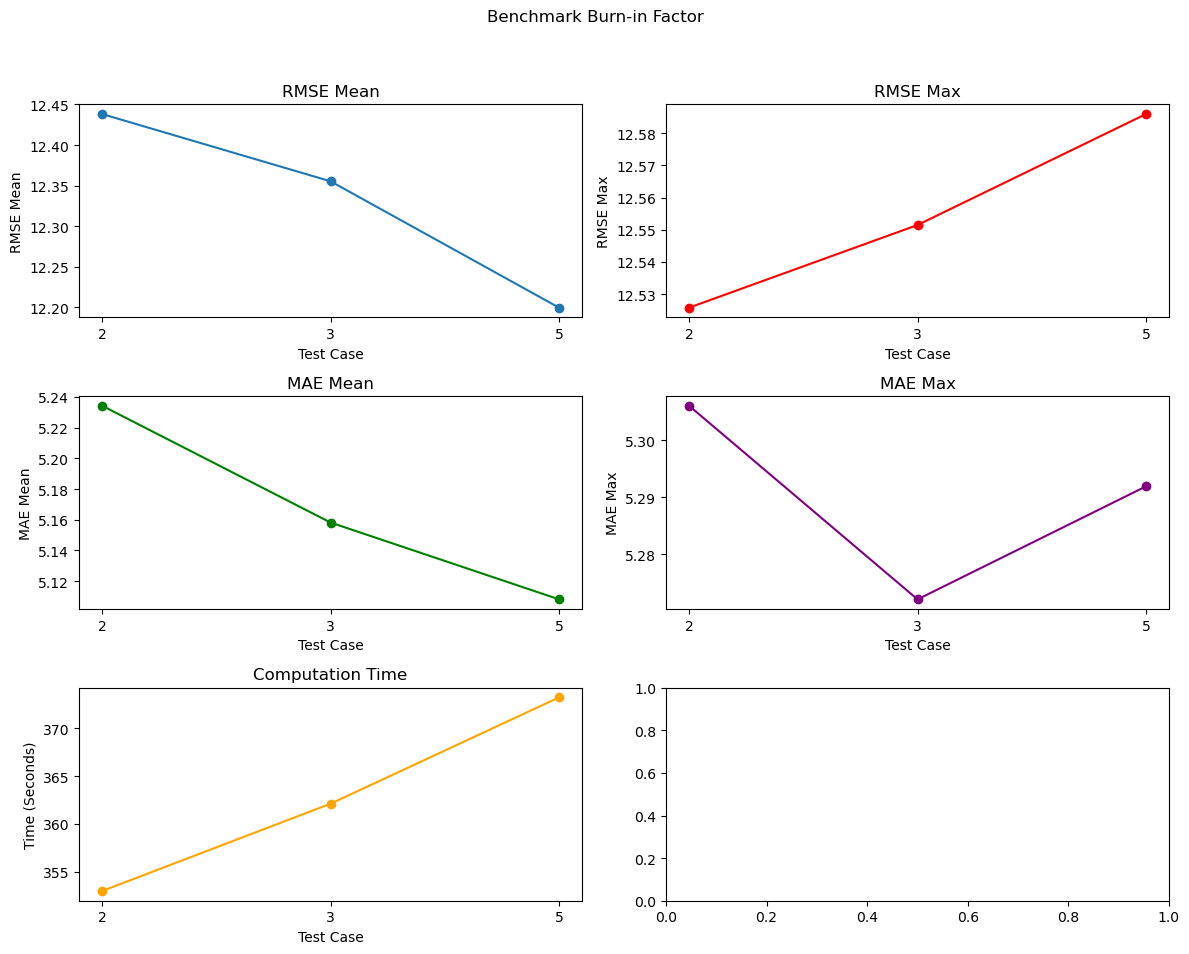

<Figure size 640x480 with 0 Axes>

In [12]:
visualize_numerical("burnin_factor", "Benchmark Burn-in Factor")

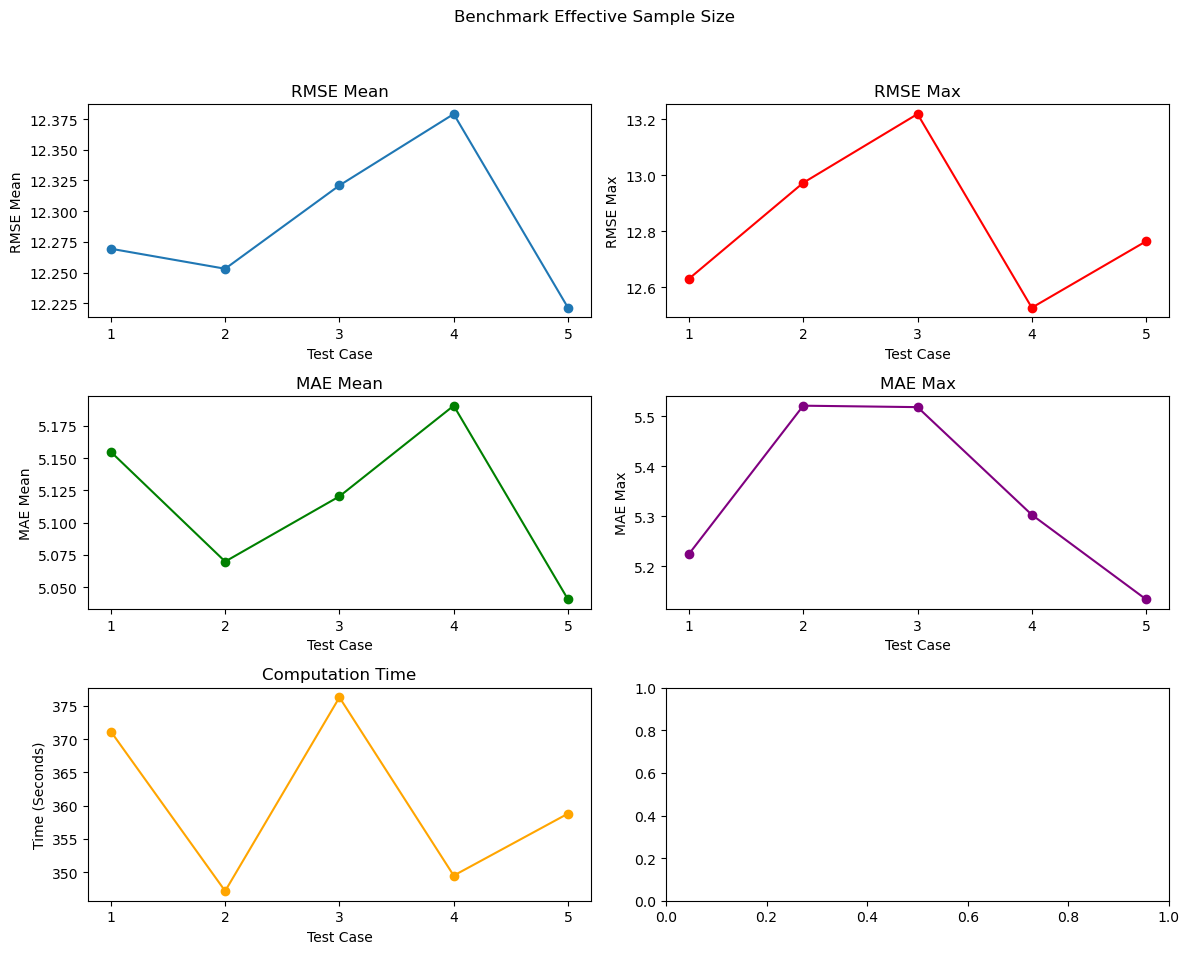

<Figure size 640x480 with 0 Axes>

In [13]:
visualize_numerical("effective_sample_size", "Benchmark Effective Sample Size")

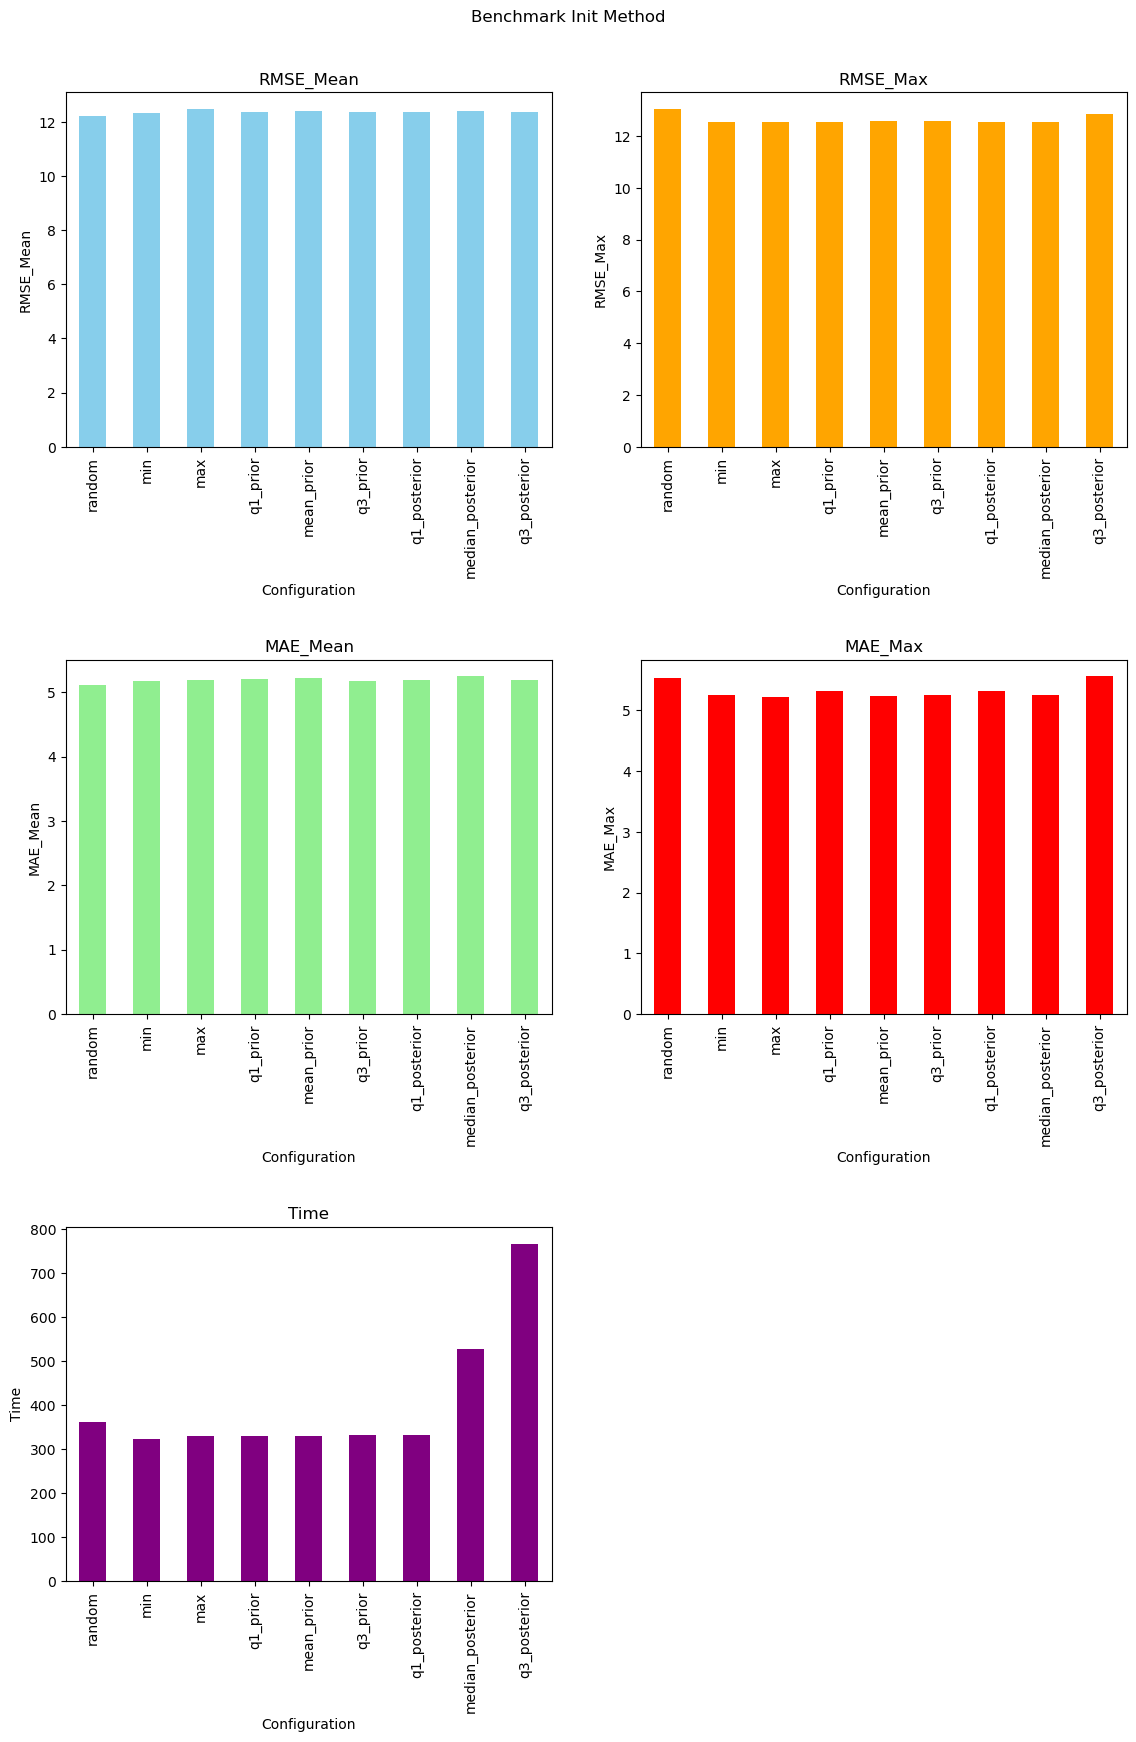

In [14]:
visualize_categorical("init_method", "Benchmark Init Method")